In [2]:
""" Packages we'll need. """
%load_ext autoreload
%autoreload 2
import numpy as np
import pyreadstat as prs
import os
import sys
sys.path.append('../src')
from clean_data_1 import transform_dataframe_1
from clean_data_2 import transform_dataframe_2
from make_belief_network import make_belief_network
from make_belief_network import make_conditional_belief_network
from get_basic_graph_info import *
from display_network import *

In [3]:
""" Importing the GSS dataset. """

raw_df, meta = prs.read_sas7bdat("../dat/gss7222_r3.sas7bdat")

""" Cleaning the data. """
 
df, metadata = transform_dataframe_1(raw_df)    # df contains all our data, metadata contains some other random shit 

In [4]:
""" Setting the core replicating variables that we're interested in. """

variables = ["PARTYID","POLVIEWS","NATSPAC","NATENVIR","NATHEAL","NATCITY","NATCRIME","NATDRUG","NATEDUC","NATRACE","NATARMS",
"NATAID","NATFARE","NATROAD","NATSOC","NATMASS","NATPARK","NATCHLD","NATSCI","EQWLTH","SPKATH","COLATH","LIBATH","SPKRAC","COLRAC","LIBRAC","SPKCOM","COLCOM","LIBCOM","SPKMIL","COLMIL","LIBMIL","SPKHOMO",
"COLHOMO","LIBHOMO","SPKMSLM","COLMSLM","LIBMSLM","CAPPUN","GUNLAW","COURTS","GRASS","ATTEND","RELITEN","POSTLIFE","PRAYER","AFFRMACT","WRKWAYUP","HELPFUL",
"FAIR","TRUST","CONFINAN","CONBUS","CONCLERG","CONEDUC","CONFED","CONLABOR","CONPRESS","CONMEDIC","CONTV","CONJUDGE","CONSCI","CONLEGIS","CONARMY","GETAHEAD","FEPOL","ABDEFECT","ABNOMORE","ABHLTH","ABPOOR","ABRAPE","ABSINGLE","ABANY","SEXEDUC","DIVLAW","PREMARSX","TEENSEX","XMARSEX","HOMOSEX","PORNLAW",
"SPANKING","LETDIE1","SUICIDE1","SUICIDE2","POLHITOK","POLABUSE","POLMURDR","POLESCAP","POLATTAK","NEWS","TVHOURS","FECHLD","FEPRESCH","FEFAM","RACDIF1","RACDIF2","RACDIF3",
"RACDIF4","HELPPOOR","MARHOMO", "PRESLAST_NONCONFORM", "PRESLAST_DEMREP", "VOTELAST"]

In [35]:
""" Creating unconditioned belief networks. """

# Parameters
method = "spearman"     # method for calculating correlation
threshold = 0           # threshold for correlation
sample_threshold = 0    # threshold for sample size
regularisation = 0.2    # regularisation parameter for partial correlation

""" Note: for now, we keep the threshold and sample threshold at 0. 
    Regularisation can be set between around 1.5 and 2.5. """


# Timeframe - specify the start year and duration of the timeframe
start_year = 1972
end_year = 2016
duration = 4

num_variables = []
avg_degree = []
clustering_coefficient = []
highest_degree_centrality = []
highest_degree_centrality_names = []
highest_betweenness_centrality = []
highest_betweenness_centrality_names = []
highest_eigenvector_centrality = []
highest_eigenvector_centrality_names = []
for i in range(start_year, end_year, 2):
    timeframe = list(range(i, i + duration))
    print(timeframe)
    BN, variables_list, correlation_matrix = make_belief_network(df, variables, timeframe, method=method, threshold=threshold, sample_threshold=sample_threshold, regularisation=regularisation)

    # Get basic graph info
    network_info = get_network_info(correlation_matrix, variables_list)
    num_variables.append(len(variables_list))
    avg_degree.append(network_info['average_degree'])
    clustering_coefficient.append(network_info['global_properties']['clustering_coefficient'])
    degree_centralities = network_info['all_degree_centrality']
    betweenness_centralities = network_info['all_betweenness_centrality']
    eigenvector_centralities = network_info['all_eigenvector_centrality']

    highest_degree_centrality_names.append(max(degree_centralities, key=degree_centralities.get))
    highest_betweenness_centrality_names.append(max(betweenness_centralities, key=betweenness_centralities.get))
    highest_eigenvector_centrality_names.append(max(eigenvector_centralities, key=eigenvector_centralities.get))
    
    highest_degree_centrality.append(degree_centralities[max(degree_centralities, key=degree_centralities.get)])
    highest_betweenness_centrality.append(betweenness_centralities[max(betweenness_centralities, key=betweenness_centralities.get)])
    highest_eigenvector_centrality.append(eigenvector_centralities[max(eigenvector_centralities, key=eigenvector_centralities.get)])
    

[1972, 1973, 1974, 1975]
[1974, 1975, 1976, 1977]
[1976, 1977, 1978, 1979]
[1978, 1979, 1980, 1981]
[1980, 1981, 1982, 1983]
[1982, 1983, 1984, 1985]
[1984, 1985, 1986, 1987]
[1986, 1987, 1988, 1989]
[1988, 1989, 1990, 1991]
[1990, 1991, 1992, 1993]
[1992, 1993, 1994, 1995]
[1994, 1995, 1996, 1997]
[1996, 1997, 1998, 1999]
[1998, 1999, 2000, 2001]
[2000, 2001, 2002, 2003]
[2002, 2003, 2004, 2005]
[2004, 2005, 2006, 2007]
[2006, 2007, 2008, 2009]
[2008, 2009, 2010, 2011]
[2010, 2011, 2012, 2013]
[2012, 2013, 2014, 2015]
[2014, 2015, 2016, 2017]


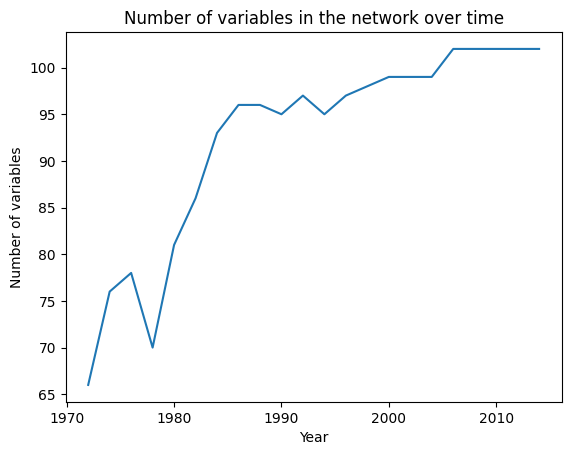

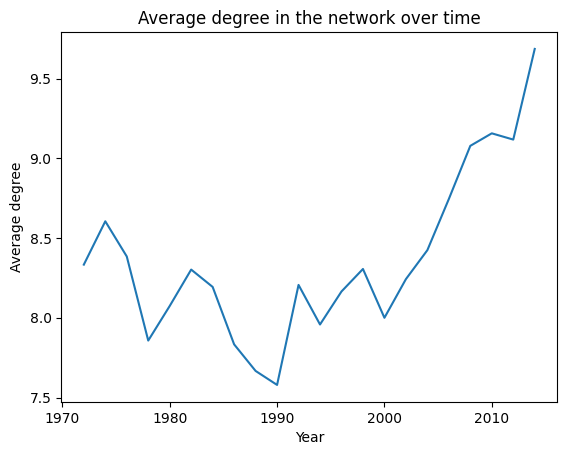

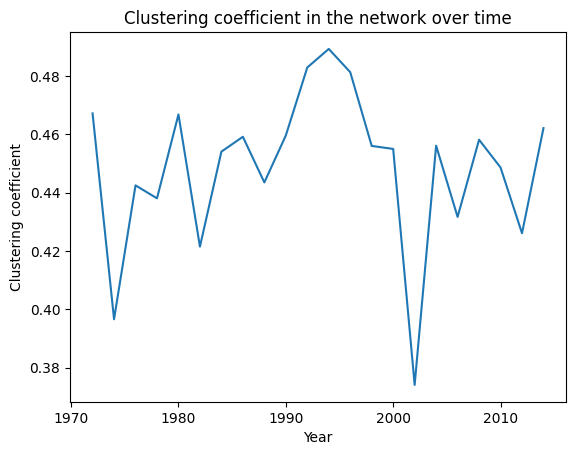

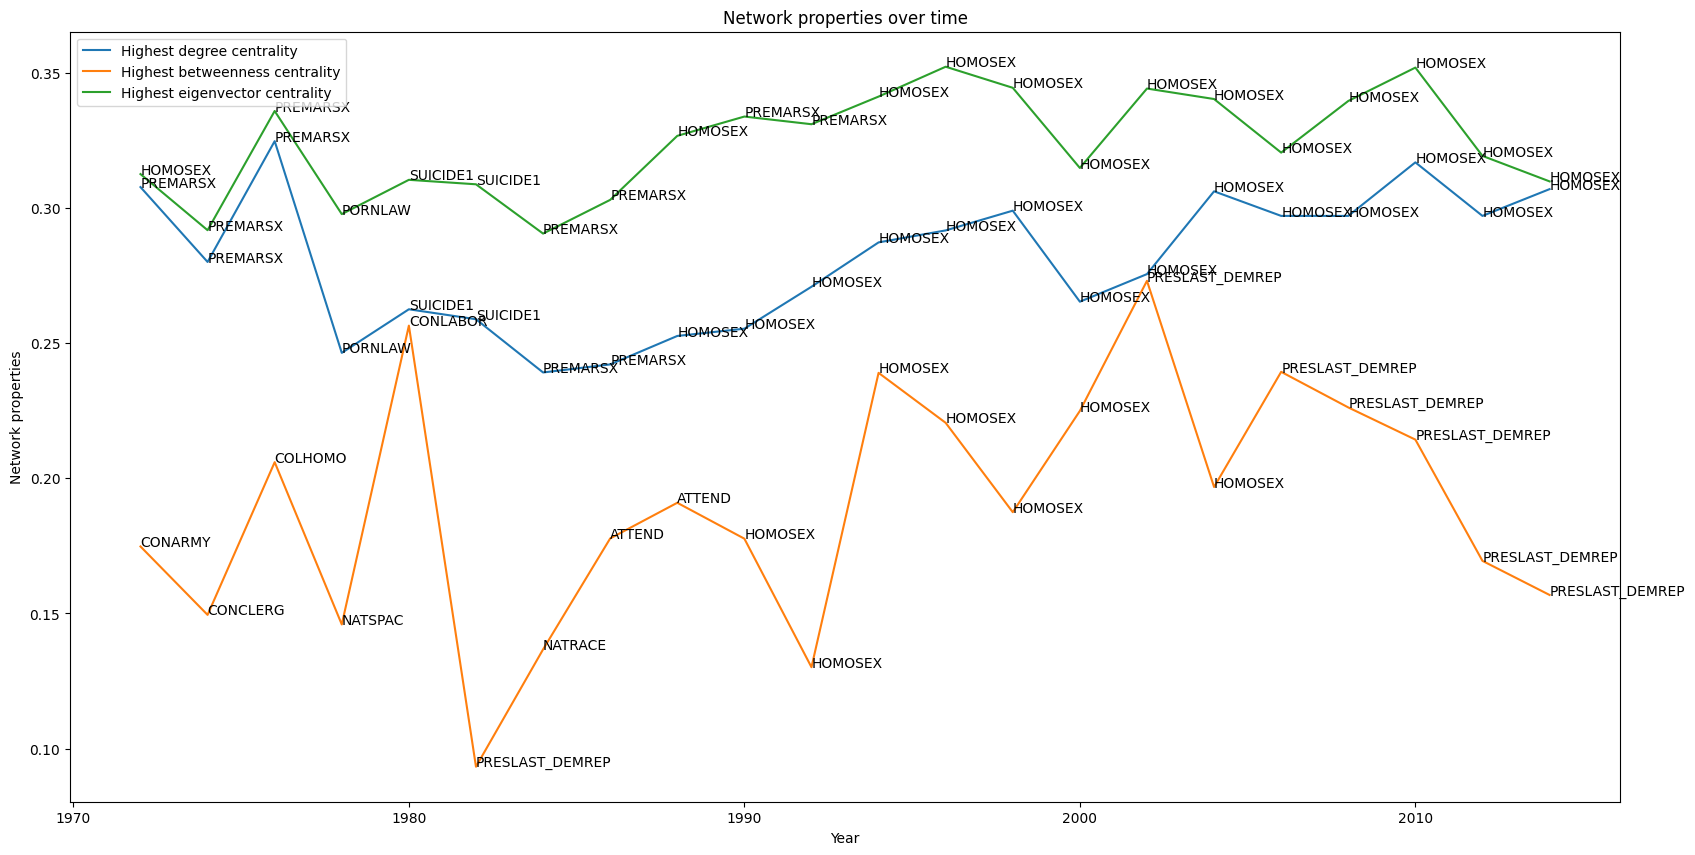

In [38]:
""" Make plots of the network info. """
import matplotlib.pyplot as plt


plt.plot(range(start_year, end_year, 2), num_variables)
plt.xlabel('Year')
plt.ylabel('Number of variables')
plt.title('Number of variables in the network over time')
plt.show()

plt.plot(range(start_year, end_year, 2), avg_degree)
plt.xlabel('Year')
plt.ylabel('Average degree')
plt.title('Average degree in the network over time')
plt.show()

plt.plot(range(start_year, end_year, 2), clustering_coefficient, label='Clustering coefficient')
plt.xlabel('Year')
plt.ylabel('Clustering coefficient')
plt.title('Clustering coefficient in the network over time')
plt.show()


# Make this last fig large
plt.figure(figsize=(20, 10))

plt.plot(range(start_year, end_year, 2), highest_degree_centrality, label='Highest degree centrality')
plt.plot(range(start_year, end_year, 2), highest_betweenness_centrality, label='Highest betweenness centrality')
plt.plot(range(start_year, end_year, 2), highest_eigenvector_centrality, label='Highest eigenvector centrality')

# Label points with names
for i, txt in enumerate(highest_degree_centrality_names):
    plt.annotate(txt, (range(start_year, end_year, 2)[i], highest_degree_centrality[i]))

for i, txt in enumerate(highest_betweenness_centrality_names):
    plt.annotate(txt, (range(start_year, end_year, 2)[i], highest_betweenness_centrality[i]))

for i, txt in enumerate(highest_eigenvector_centrality_names):
    plt.annotate(txt, (range(start_year, end_year, 2)[i], highest_eigenvector_centrality[i]))

plt.xlabel('Year')
plt.ylabel('Network properties')
plt.title('Network properties over time')
plt.legend()
plt.show()
